In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# স্টক লিস্ট (5টি জনপ্রিয় স্টক)
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# ডেটা ডাউনলোড
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
# ডেটা ডাউনলোড
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
print("প্রথম ৫ সারি:")
print(data.head())
print("\nশেষ ৫ সারি:")
print(data.tail())
print("\nডেটার সংক্ষিপ্ত তথ্য:")
print(data.info())


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed

প্রথম ৫ সারি:
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620834  94.900497  68.026016  153.042282  28.684000
2020-01-03  71.914818  93.748497  67.670158  151.136597  29.534000
2020-01-06  72.487839  95.143997  69.473846  151.527328  30.102667
2020-01-07  72.146927  95.343002  69.339645  150.145706  31.270666
2020-01-08  73.307503  94.598503  69.833183  152.537323  32.809334

শেষ ৫ সারি:
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2025-07-28  214.050003  232.789993  192.580002  512.500000  325.589996
2025-07-29  211.270004  231.009995  195.750000  512.570007  321.200012
2025-07-30  209.050003  230.190002  196.529999  513.239990  319.040009
2025-07-31  207.570007  234.110001  191.899994  533.500000  308.269989
2025-08-01  202.380005  214.750000  189.130005  524.109985  302.630005

ডেটার 

In [3]:
# দৈনিক রিটার্ন গণনা
returns = data.pct_change().dropna()
print("\nদৈনিক রিটার্নের প্রথম ৫ সারি:")
print(returns.head())

# বার্ষিক রিটার্ন ও কোভেরিয়েন্স ম্যাট্রিক্স
mu = returns.mean() * 252  # বার্ষিক গড় রিটার্ন (252 ট্রেডিং দিন)
Sigma = returns.cov() * 252  # বার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স
print("\nবার্ষিক গড় রিটার্ন (mu):")
print(mu)
print("\nবার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স (Sigma):")
print(Sigma)


দৈনিক রিটার্নের প্রথম ৫ সারি:
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06  0.007968  0.014886  0.026654  0.002585  0.019255
2020-01-07 -0.004703  0.002092 -0.001932 -0.009118  0.038801
2020-01-08  0.016086 -0.007809  0.007118  0.015929  0.049205
2020-01-09  0.021241  0.004799  0.010498  0.012493 -0.021945

বার্ষিক গড় রিটার্ন (mu):
Ticker
AAPL     0.236610
AMZN     0.211882
GOOGL    0.237138
MSFT     0.267055
TSLA     0.653247
dtype: float64

বার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স (Sigma):
Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.105026  0.070314  0.067220  0.071299  0.109493
AMZN    0.070314  0.130289  0.076680  0.074463  0.110299
GOOGL   0.067220  0.076680  0.106505  0.071737  0.093433
MSFT    0.071299  0.074463  0.071737  0.091506  0.093058
TSLA    0.109493  0.

In [13]:
def newton_raphson_portfolio_optimization(mu, Sigma, target_return, max_iter=100, tol=1e-6):
    n = len(mu)  # স্টকের সংখ্যা
    w = np.ones(n) / n  # প্রাথমিক ওয়েট (সমান বন্টন)
    e = np.ones(n)  # একক ভেক্টর
    
    # পেনাল্টি প্যারামিটার (কনস্ট্রেইন্ট নিশ্চিত করতে)
    alpha = 1e5
    
    for i in range(max_iter):
        # পোর্টফোলিও রিটার্ন ও ভ্যারিয়েন্স
        port_return = w @ mu
        port_variance = w @ Sigma @ w
        
        # কনস্ট্রেইন্ট ভায়োলেশন
        return_violation = port_return - target_return
        sum_violation = np.sum(w) - 1
        
        # গ্রেডিয়েন্ট (Gradient) গণনা
        grad_return = mu
        grad_sum = e
        grad_variance = 2 * Sigma @ w
        
        # ল্যাগ্রাঞ্জিয়ান গ্রেডিয়েন্ট
        gradient = grad_variance + alpha * return_violation * grad_return + alpha * sum_violation * grad_sum
        
        # হেসিয়ান ম্যাট্রিক্স (Hessian Matrix)
        H_variance = 2 * Sigma
        H_return = alpha * np.outer(grad_return, grad_return)
        H_sum = alpha * np.outer(grad_sum, grad_sum)
        H = H_variance + H_return + H_sum
        
        # নিউটন-র্যাফসন আপডেট: w_new = w_old - H^{-1} * gradient
        delta_w = np.linalg.solve(H, gradient)
        w_new = w - delta_w
        
        # কনভারজেন্স চেক
        if np.linalg.norm(w_new - w) < tol:
            print(f"কনভার্জড! {i+1} ইটারেশনের পর")
            break
            
        w = w_new
    
    return w_new

# টার্গেট রিটার্ন সেট (mu-এর গড়)
target_return = np.mean(mu)
w_optimal = newton_raphson_portfolio_optimization(mu, Sigma, target_return)

print("\nঅপ্টিমাল ওয়েট (নিউটন-র্যাফসন পদ্ধতি):")
for stock, weight in zip(stocks, w_optimal):
    print(f"{stock}: {weight:.4f}")

# পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন)
portfolio_risk = np.sqrt(w_optimal @ Sigma @ w_optimal)
portfolio_return = w_optimal @ mu
print(f"\nপোর্টফোলিও রিটার্ন: {portfolio_return:.4f}")
print(f"পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন): {portfolio_risk:.4f}")

কনভার্জড! 2 ইটারেশনের পর

অপ্টিমাল ওয়েট (নিউটন-র্যাফসন পদ্ধতি):
AAPL: 0.1313
GOOGL: -0.0578
MSFT: 0.1960
AMZN: 0.5730
TSLA: 0.1574

পোর্টফোলিও রিটার্ন: 0.3212
পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন): 0.3090


c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2451 (\N{BENGALI LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2479 (\N{BENGALI LETTER YA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2492 (\N{BENGALI SIGN NUKTA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\

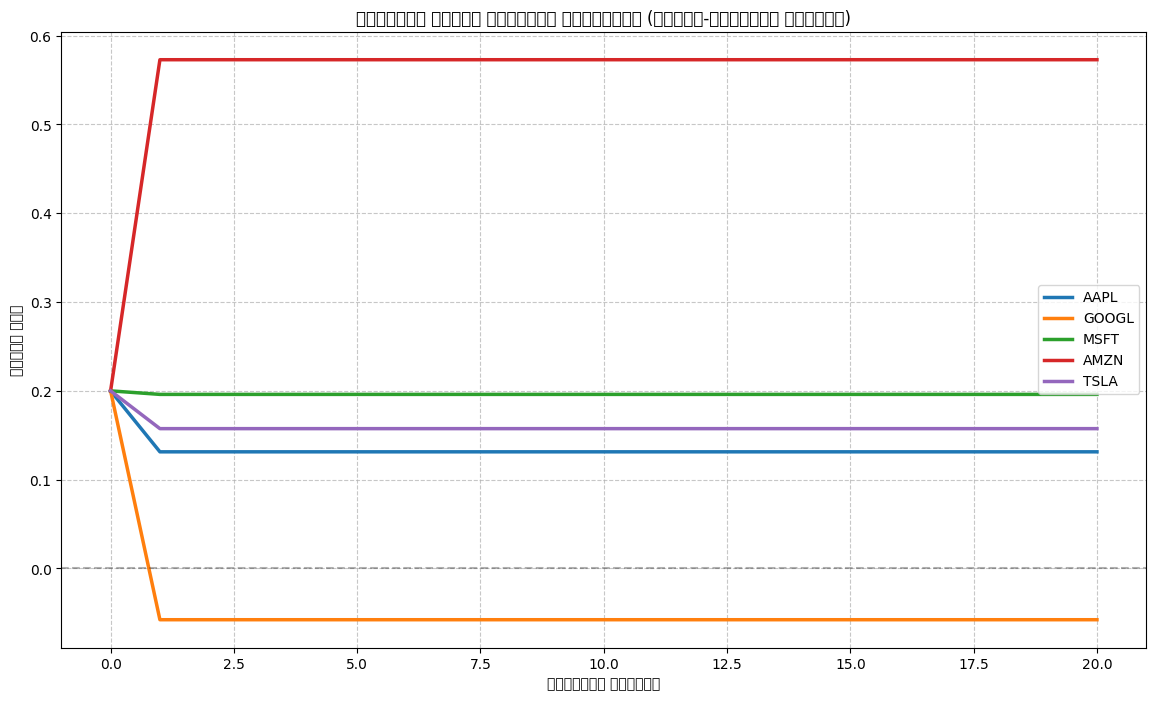

In [5]:
# ইটারেশন ট্র্যাকিং
def track_weights(mu, Sigma, target_return):
    n = len(mu)
    w = np.ones(n) / n
    e = np.ones(n)
    alpha = 1e5
    weight_history = [w.copy()]
    
    for i in range(20):  # 20 ইটারেশন ট্র্যাক
        port_return = w @ mu
        return_violation = port_return - target_return
        sum_violation = np.sum(w) - 1
        
        gradient = 2 * Sigma @ w + alpha * return_violation * mu + alpha * sum_violation * e
        H = 2 * Sigma + alpha * np.outer(mu, mu) + alpha * np.outer(e, e)
        delta_w = np.linalg.solve(H, gradient)
        w -= delta_w
        weight_history.append(w.copy())
    
    return np.array(weight_history)

weight_history = track_weights(mu, Sigma, target_return)

# ওয়েট পরিবর্তনের গ্রাফ
plt.figure(figsize=(14, 8))
for i, stock in enumerate(stocks):
    plt.plot(weight_history[:, i], label=stock, linewidth=2.5)
    
plt.title("ইটারেশন জুড়ে ওয়েটের পরিবর্তন (নিউটন-র্যাফসন পদ্ধতি)")
plt.xlabel("ইটারেশন সংখ্যা")
plt.ylabel("ওয়েট মান")
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2455 (\N{BENGALI LETTER GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2477 (\N{BENGALI LETTER BHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jihad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\U

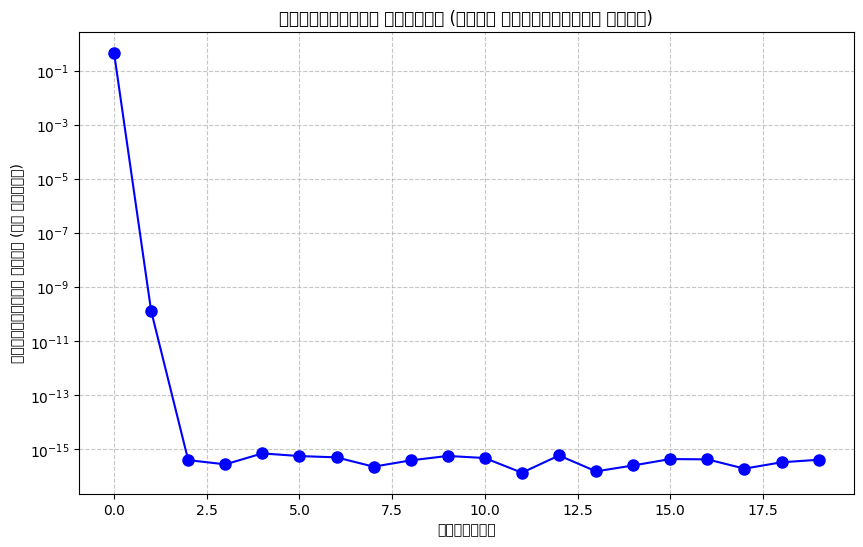

In [6]:
# কনভারজেন্স ট্র্যাকিং
norms = [np.linalg.norm(weight_history[i] - weight_history[i-1]) 
         for i in range(1, len(weight_history))]

plt.figure(figsize=(10, 6))
plt.plot(norms, 'bo-', markersize=8)
plt.yscale('log')
plt.title("কনভারজেন্স ইতিহাস (ওয়েট পরিবর্তনের নর্ম)")
plt.xlabel("ইটারেশন")
plt.ylabel("পরিবর্তনের নর্ম (লগ স্কেল)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

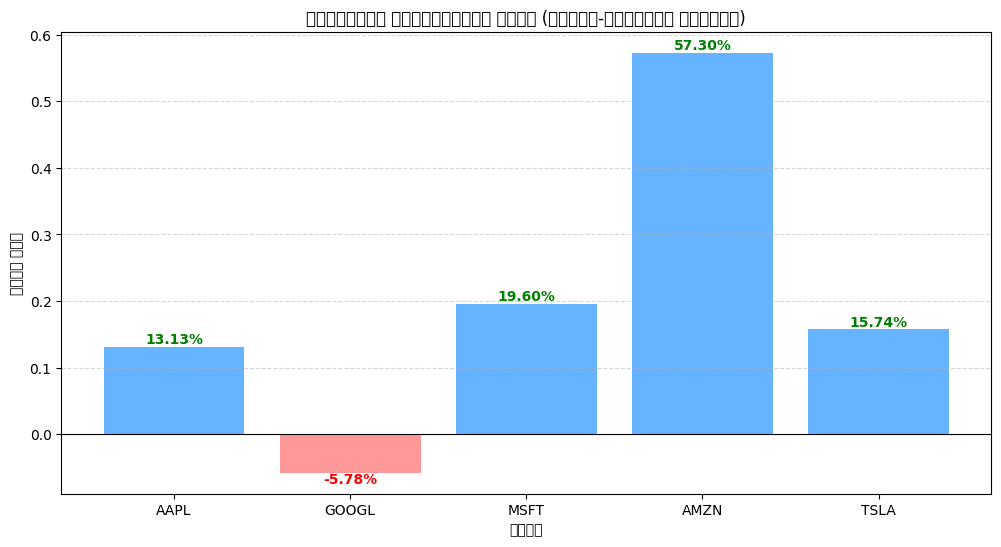

In [10]:
# সমাধান ২ ব্যবহার করুন (বার চার্ট)
plt.figure(figsize=(12, 6))
colors = ['#66b3ff' if w >= 0 else '#ff9999' for w in w_optimal]
bars = plt.bar(stocks, w_optimal, color=colors)

# মানগুলো লেবেল হিসেবে যোগ করুন
for bar in bars:
    height = bar.get_height()
    va = 'bottom' if height >=0 else 'top'
    color = 'green' if height >=0 else 'red'
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va=va, color=color, fontweight='bold')

plt.axhline(0, color='black', linewidth=0.8)
plt.title("অপ্টিমাল পোর্টফোলিও ওয়েট (নিউটন-র্যাফসন পদ্ধতি)")
plt.xlabel("স্টক")
plt.ylabel("ওয়েট মান")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

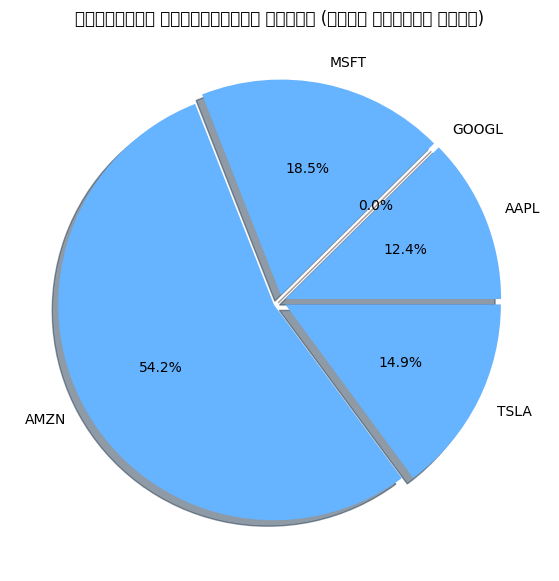

In [11]:
# শুধুমাত্র পজিটিভ ওয়েট নিন
positive_weights = np.maximum(w_optimal, 0)
positive_weights /= positive_weights.sum()  # নর্মালাইজ করুন (যোগফল=১)

plt.figure(figsize=(10, 7))
explode = [0.03 for _ in stocks]  # সব স্টক এক্সপ্লোড
plt.pie(positive_weights, labels=stocks, autopct='%1.1f%%', 
        explode=explode, colors=colors, shadow=True)
plt.title("অপ্টিমাল পোর্টফোলিও বন্টন (শুধু পজিটিভ ওয়েট)")
plt.show()